encryptage d'image sur les bit de plus grandes importances 

In [26]:
#image en niveau de gris, on modifie les niveau de gris grace a une xor 
#avec une clé aléatoire sur chacun des bit jusqu'au bit s de plus hautes importances. 

import random


def base2(n):
    """Convertit un entier n en une liste de bits (base 2)"""
    bits = [0]*8  # Initialise une liste de 8 bits à 0
    k=1
    while n > 0:
        bits[len(bits)-k] = n % 2  # Stocke le bit le plus petit à droite
        k+=1
        n //= 2
    return bits  

def base10(bits):
    """Convertit une liste de bits (base 2) en un entier n"""
    n = 0
    for i in range(len(bits)):
        n += bits[len(bits)-1-i] * (2**i)  # Calcule la valeur décimale
    return n
puissance2= [1,2,4,8,16,32,64,128,255]
for n in puissance2 : 
    print(base2(n))
    print(base10(base2(n)))

[0, 0, 0, 0, 0, 0, 0, 1]
1
[0, 0, 0, 0, 0, 0, 1, 0]
2
[0, 0, 0, 0, 0, 1, 0, 0]
4
[0, 0, 0, 0, 1, 0, 0, 0]
8
[0, 0, 0, 1, 0, 0, 0, 0]
16
[0, 0, 1, 0, 0, 0, 0, 0]
32
[0, 1, 0, 0, 0, 0, 0, 0]
64
[1, 0, 0, 0, 0, 0, 0, 0]
128
[1, 1, 1, 1, 1, 1, 1, 1]
255


In [27]:

def chiffrage (image,s):
    random.seed(42)  # Pour reproductibilité des résultats
    image_chiffrage = image.copy() 
    for i in range (len (image)):
        for j in range (len(image[0])):
            bits = base2(image[i][j])
            for p in range (0, s):
                k = random.randint(0, 1)
                bits[p] = bits[p] ^ k
            image_chiffrage[i][j] = base10(bits)

    return image_chiffrage
print("Test encryptage :")
print ([[1,2,4,8],[16,32,64,128]])
for n in [1,2,4,8,16,32,64,128]:
    print(base2(n))
print(chiffrage([[1,2,4,8],[16,32,64,128]], 3))
for j in chiffrage([[1,2,4,8],[16,32,64,128]], 3)[0]:
    print(base2(j))
for j in chiffrage([[1,2,4,8],[16,32,64,128]], 3)[1]:
    print(base2(j))

Test encryptage :
[[1, 2, 4, 8], [16, 32, 64, 128]]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[[33, 2, 36, 8], [16, 96, 128, 224]]
[0, 0, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0]


In [28]:
#récupération partie claire
def decalage_bit_2D(img,s):
    # copie de l'image (liste ou tableau numpy)
    img_decale = img.copy()

    # itérer par index pour ne pas confondre valeur et position
    for idx in range(len(img)):
        for idx2 in range(len(img[0])):
            pixel = int(img[idx][idx2])
            bits = base2(pixel)
            # déplacer les bits : bits[j] <- bits[j + s] pour j in [0, 8-s)
            # img[i][j]<<s
            for j in range(0, 8-s):
                bits[j] = bits[j + s] # j+s in [s,8] non crypté 
            # remplir le reste par des zéros
            for j in range(8 - s, 8):
                bits[j] = 0
            img_decale[idx][idx2] = base10(bits)
    return img_decale
print("Test decalage_bit_2D :")
print([[1,2,4,8],[16,32,64,128]])
for n in [1,2,4,8,16,32,64,128]:
    print(base2(n))
print(decalage_bit_2D([[1,2,4,8],[16,32,64,128]], 7))
for j in decalage_bit_2D([[1,2,4,8],[16,32,64,128]], 7)[0]:
    print(base2(j))
for j in decalage_bit_2D([[1,2,4,8],[16,32,64,128]], 7)[1]:
    print(base2(j))
print(decalage_bit_2D([[1,2,4,8],[16,32,64,128]], 7))

Test decalage_bit_2D :
[[1, 2, 4, 8], [16, 32, 64, 128]]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[[128, 0, 0, 0], [0, 0, 0, 0]]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[[128, 0, 0, 0], [0, 0, 0, 0]]


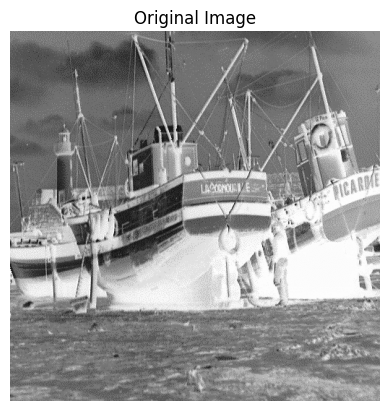

In [29]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
#pour plusieurs images for 
path_img = r"C:\Users\barta\Documents\cours\iaprojets\PDR\datasets\PPM\Boat.512.ppm"
img = imread(path_img)
imggray = (img[:,:,0]*255).astype(np.uint8)  # Conversion en niveaux de gris
plt.imshow(imggray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

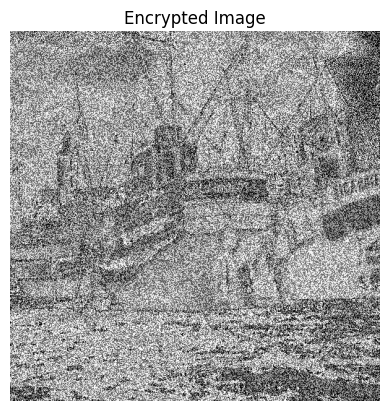

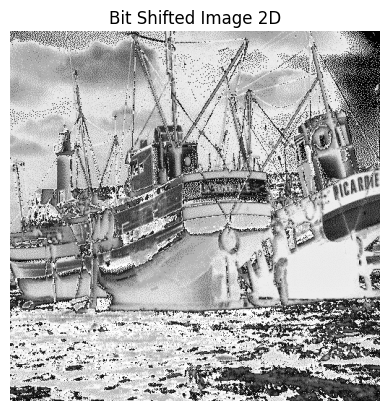

In [30]:

A= chiffrage(imggray, 1)

plt.imshow(A, cmap='gray')
plt.title("Encrypted Image")
plt.axis('off')
plt.show()

C = decalage_bit_2D(imggray, 1)
plt.imshow(C, cmap='gray')
plt.title("Bit Shifted Image 2D")
plt.axis('off')
plt.show()



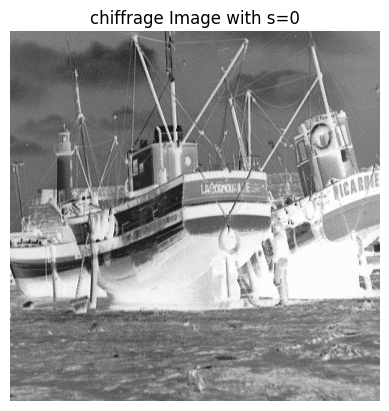

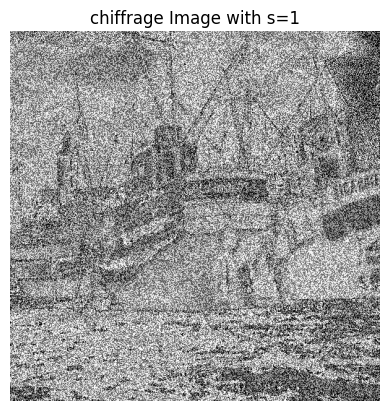

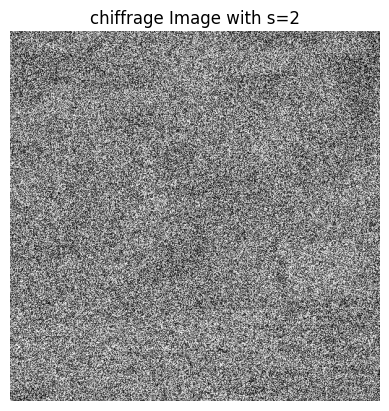

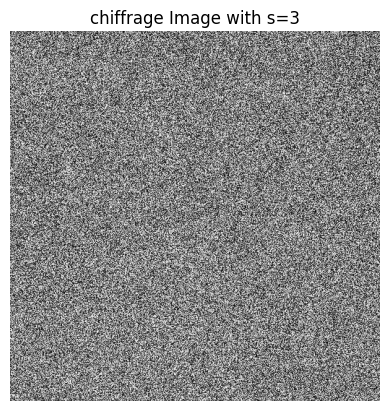

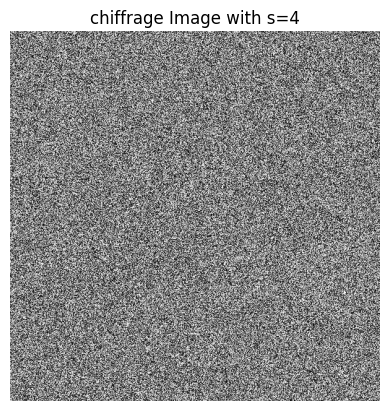

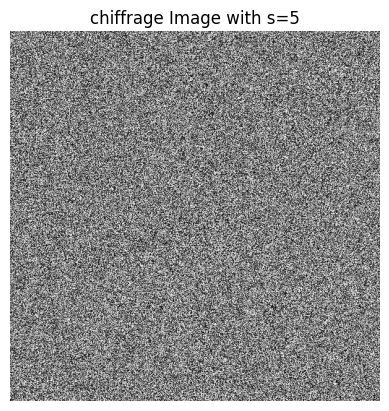

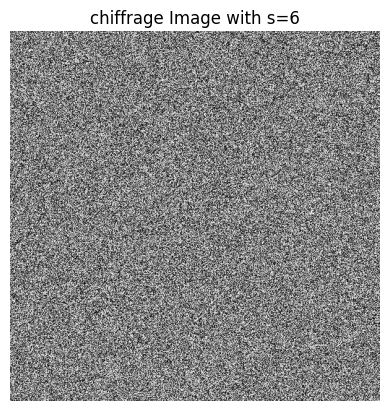

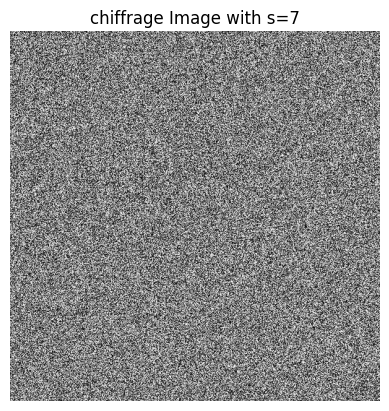

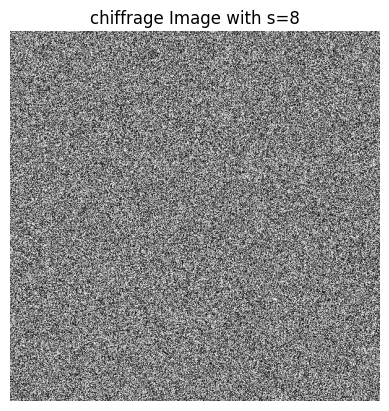

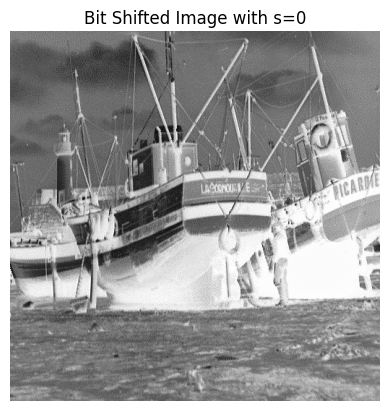

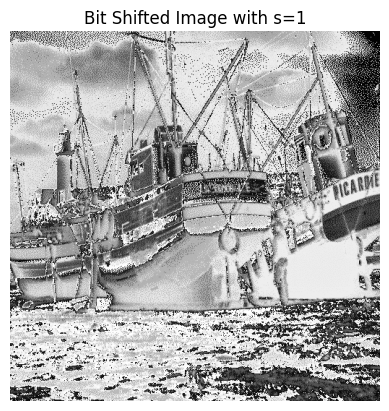

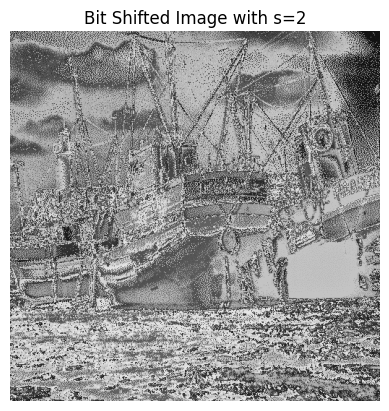

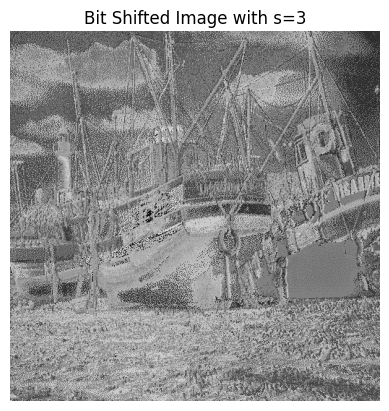

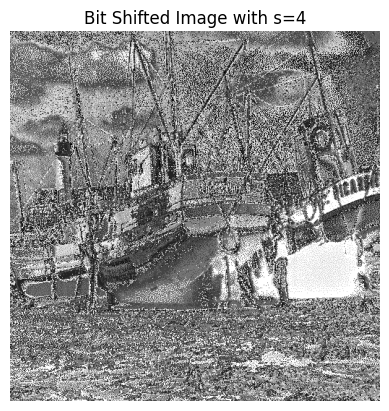

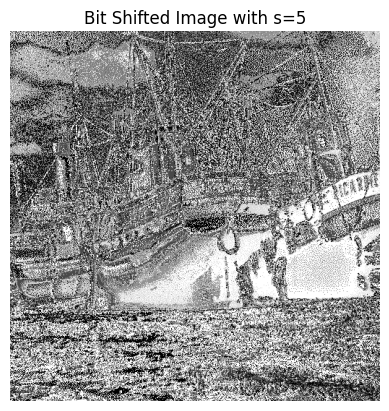

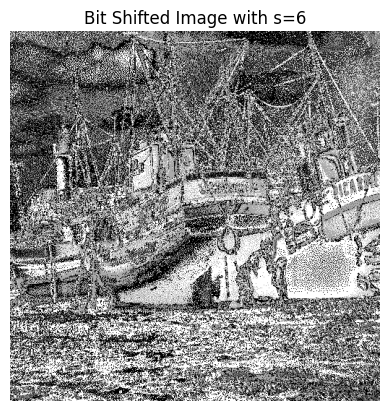

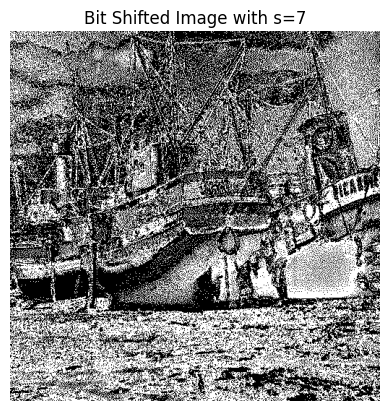

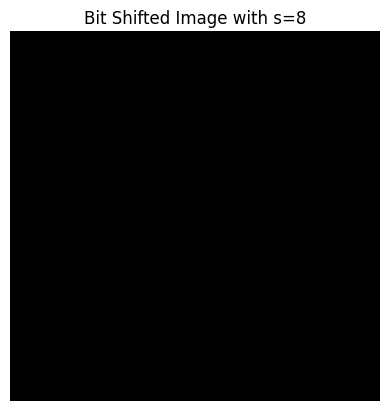

In [31]:
S=[i for i in range(0,9)]
for s in S : 
    A= chiffrage(imggray, s)
    plt.imshow(A, cmap='gray')
    plt.title(f"chiffrage Image with s={s}")
    plt.axis('off')
    plt.show()

for s in S : 
    C=decalage_bit_2D(imggray, s)
    plt.imshow(C, cmap='gray')
    plt.title(f"Bit Shifted Image with s={s}")
    plt.axis('off')
    plt.show()



    

information mutuelle avec histogramme 

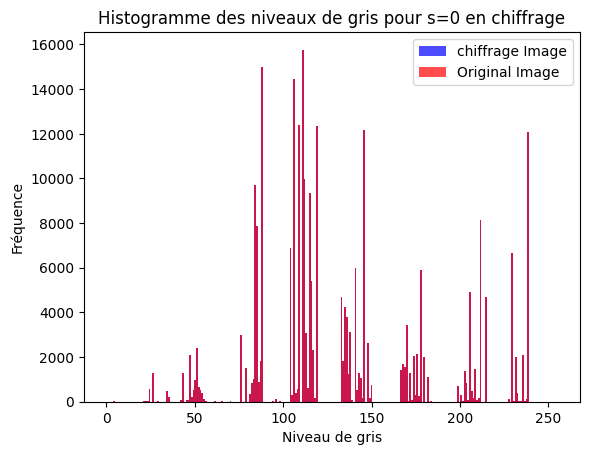

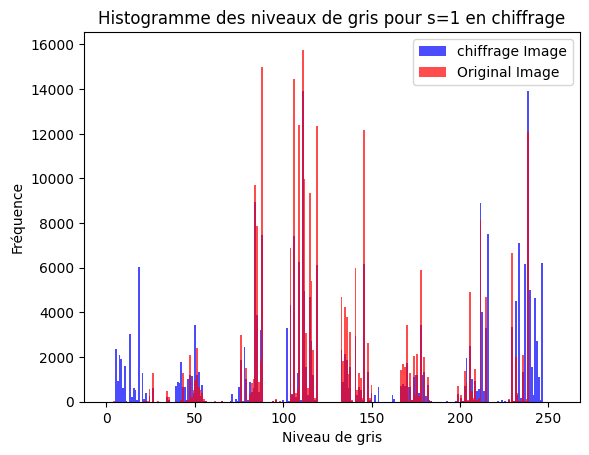

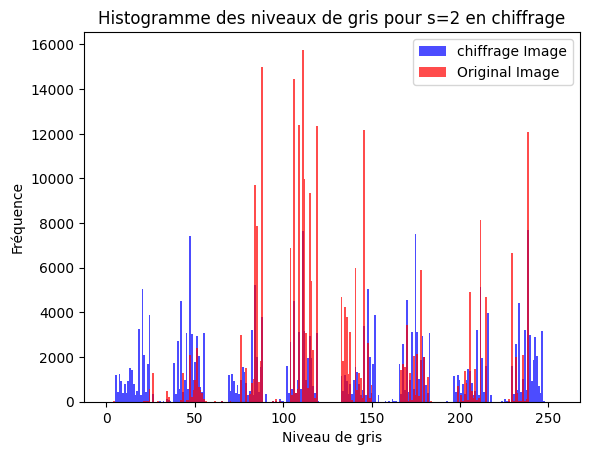

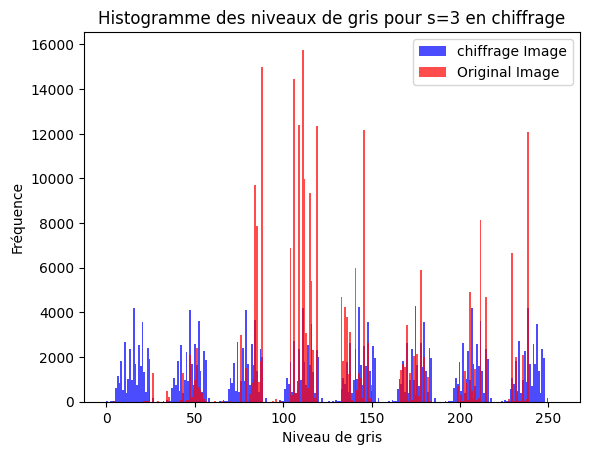

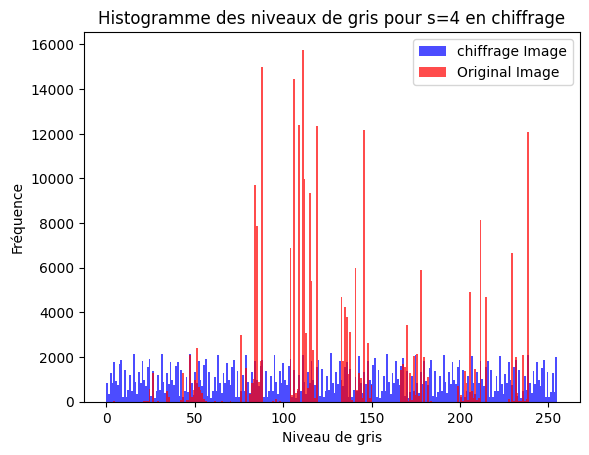

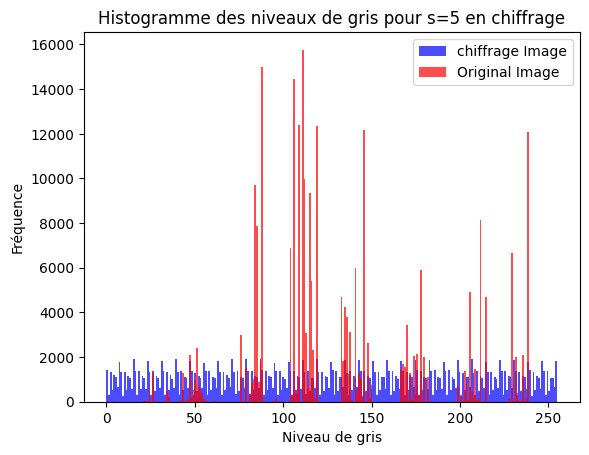

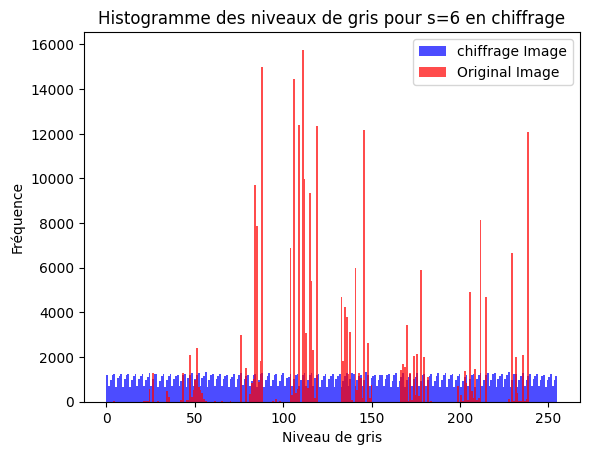

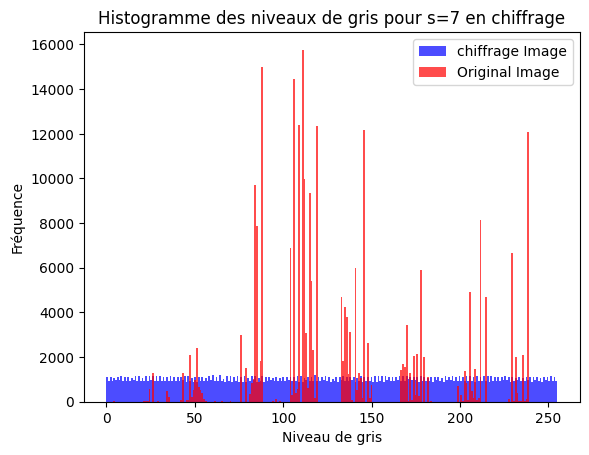

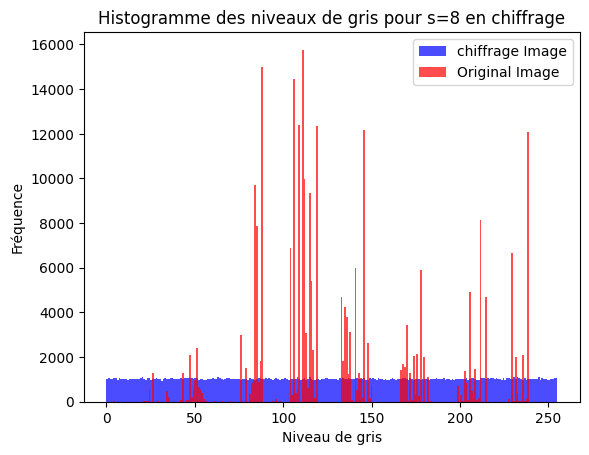

In [32]:
#distribution des niveaxu de gris de image originale et encryptée pour s=0,1,2,...8
for s in S : 
    A= chiffrage(imggray, s)
    plt.hist(A.flatten(), bins=256, range=(0,255), alpha=0.7, color='blue', label='chiffrage Image')
    plt.hist(imggray.flatten(), bins=256, range=(0,255), alpha=0.7, color='red', label='Original Image')
    plt.title(f"Histogramme des niveaux de gris pour s={s} en chiffrage")
    plt.xlabel("Niveau de gris")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()


modifier les bits de plus grandes importances décale les couleurs vers les puissances de 2 

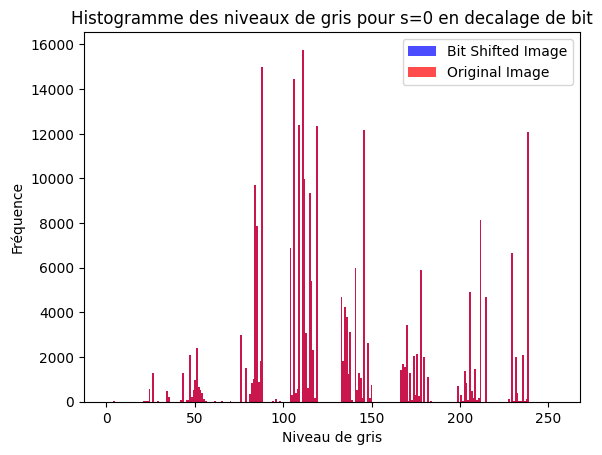

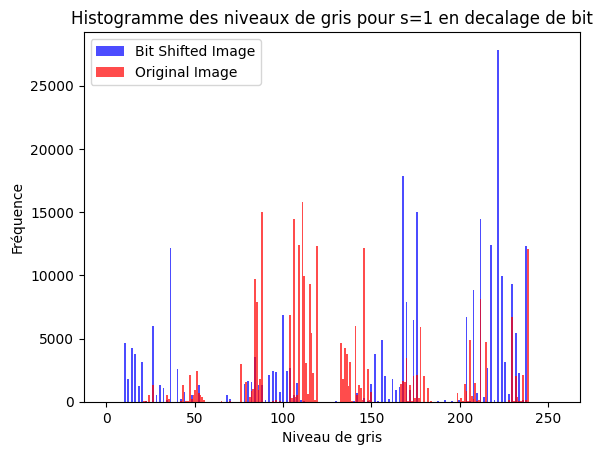

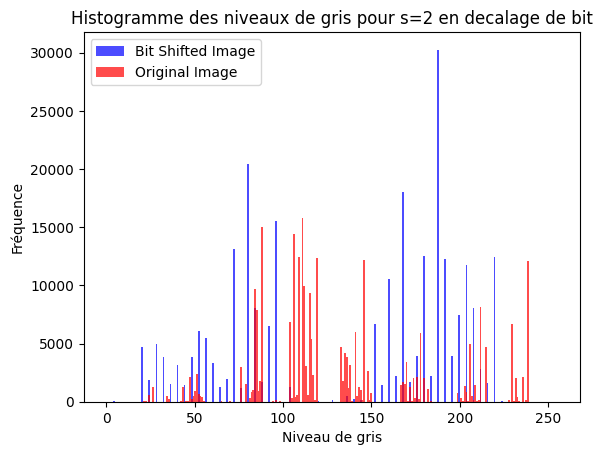

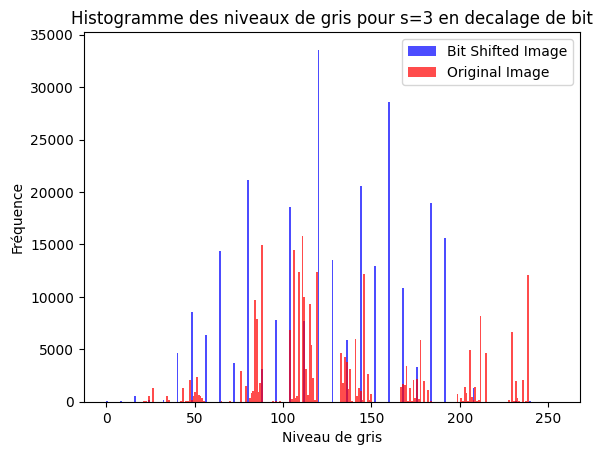

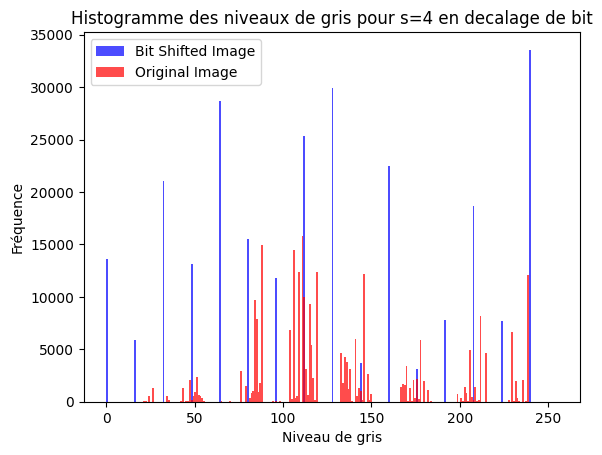

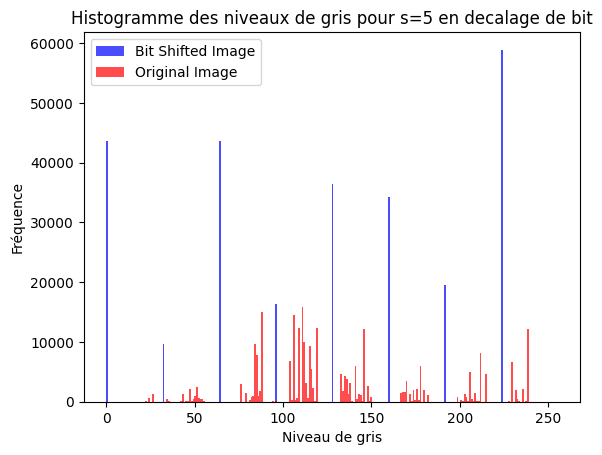

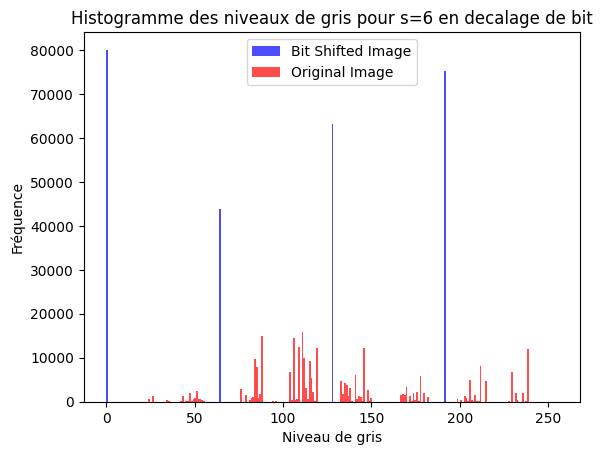

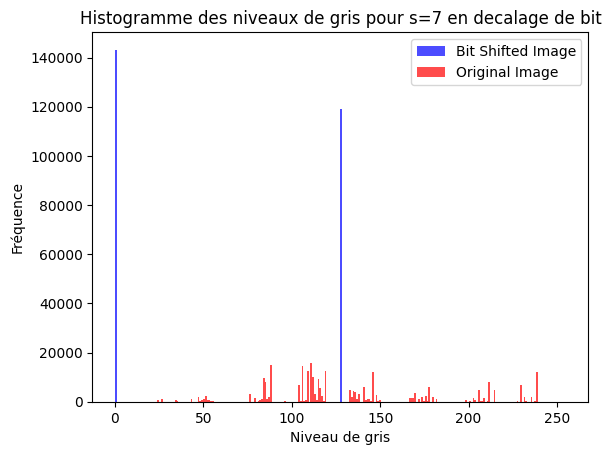

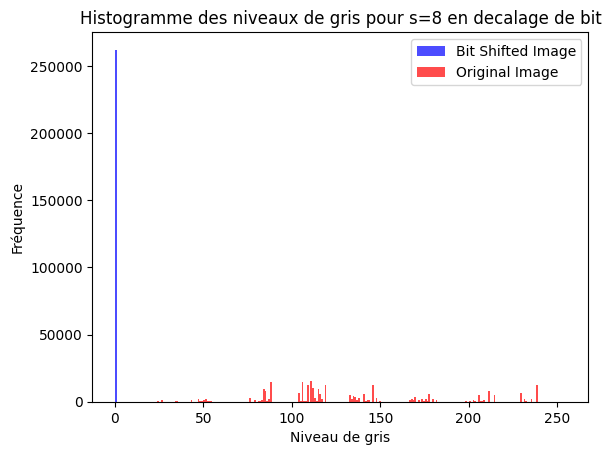

In [33]:
#histogramme des niveaux de gris pour l'image avec decalage de bit
for s in S : 
    B = decalage_bit_2D(imggray, s)
    plt.hist(B.flatten(), bins=256, range=(0,255), alpha=0.7, color='blue', label='Bit Shifted Image')
    plt.hist(imggray.flatten(), bins=256, range=(0,255), alpha=0.7, color='red', label='Original Image')
    plt.title(f"Histogramme des niveaux de gris pour s={s} en decalage de bit")
    plt.xlabel("Niveau de gris")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()

décaler les bits de plus grande simportances illustrent leurs importances : couleurs tres foncée devient d'un coup tres claire : 
la difference de l'histogramme bleu entre s=1 et s=2 prouve le comportement non linéaire de l'information dans une image

In [34]:
#Mutual Information entre l'image originale et l'image encryptée pour s=1,2,...8
#les distributions de X et Y sont obtenues à partir des histogrammes des niveaux de gris
import numpy as np
def hist2d(x, y, bins):
    """Calcule l'histogramme 2D normalisé de x et y"""
    hist, _, _ = np.histogram2d(x, y, bins=bins)
    hist = hist / np.sum(hist)  # Normalisation pour obtenir une distribution de probabilité
    return hist
def hist1d(x, bins):
    """Calcule l'histogramme 1D normalisé de x"""
    hist, _ = np.histogram(x, bins=bins)
    hist = hist / np.sum(hist)  # Normalisation pour obtenir une distribution de probabilité
    return hist

In [35]:
#MI = KL(P(X,Y)||P(X)P(Y)) = sum(p(i,j)Log(p(i,j)/p(i)p(j)))
#p(i)= ni/N ou N est le nombre de pixel
S = [i for i in range (0,8)]
mi_encrypt=[]
mi_decalage=[]

for s in S :
    x =  imggray.flatten()
    y =  decalage_bit_2D(imggray, s).flatten()
    z = chiffrage(imggray, s).flatten()

    distrib_x = hist1d(x, bins=256) # Distribution marginale de X
    distrib_y = hist1d(y,  bins=256)  # Distribution marginale de Y
    distrib_z = hist1d(z, bins=256) # Distribution marginale de Z

    jointdistib_dec = hist2d(x, y, bins=256)  
    jointdistib_enc = hist2d(x, z, bins=256)

    h_x = 0
    MI_enc=0
    MI_dec=0
    N = len(imggray)*len(imggray[0]) #nombre total de pixels
    for i in range(256):
        h_x += - (distrib_x[i]) * np.log(distrib_x[i]) if distrib_x[i] > 0 else 0 #entropie de X si px(i)>0, division par N pour obtenir probabilité
        px = distrib_x[i]
        for j in range(256):
            py = distrib_y[j]
            pxy = jointdistib_dec[i][j]
            if jointdistib_dec[i][j] > 0 and distrib_x[i] > 0 and distrib_y[j] > 0: #decalage bit 
                    MI_dec+= pxy * np.log(pxy/(px*py))
            
            pz = distrib_z[j]
            pxz = jointdistib_enc[i][j]
            if jointdistib_enc[i][j] > 0 and distrib_x[i] > 0 and distrib_z[j] > 0: #choffrement
                    MI_enc+= pxz * np.log(pxz/(px*pz))
            
    mi_encrypt.append(MI_enc)
    mi_decalage.append(MI_dec)
print(h_x)

3.8177400845274723


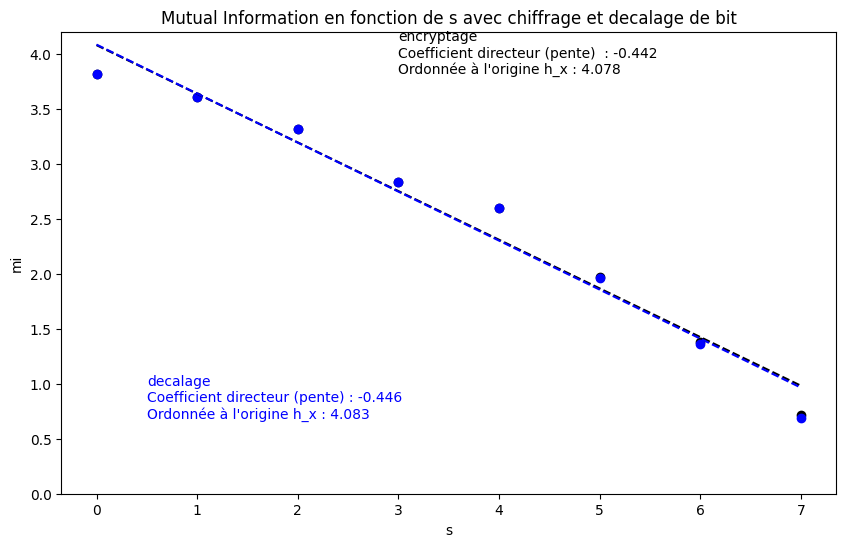

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
#droite de regression 
me, be = np.polyfit(S, mi_encrypt, 1)
md,bd = np.polyfit(S, mi_decalage, 1)
plt.plot(S, me*np.array(S) + be, '--k')
plt.plot(S, md*np.array(S) + bd, '--b')
#afficher les coeffs sur le graphe
# ameliore la position du texte sur le grapphe :
plt.text( 3, mi_encrypt[0], f"encryptage\nCoefficient directeur (pente)  : {me:.3f}\nOrdonnée à l'origine h_x : {be:.3f}", color='black')
plt.text( 0.5, min(mi_decalage), f"decalage\nCoefficient directeur (pente) : {md:.3f}\nOrdonnée à l'origine h_x : {bd:.3f}", color='blue')
plt.scatter (S, mi_encrypt, color ='black')   
plt.scatter (S, mi_decalage, color='blue')
plt.xlabel('s')
plt.ylabel('mi')
plt.ylim(0,mi_encrypt[0]*1.1)
plt.title('Mutual Information en fonction de s avec chiffrage et decalage de bit')
plt.show()

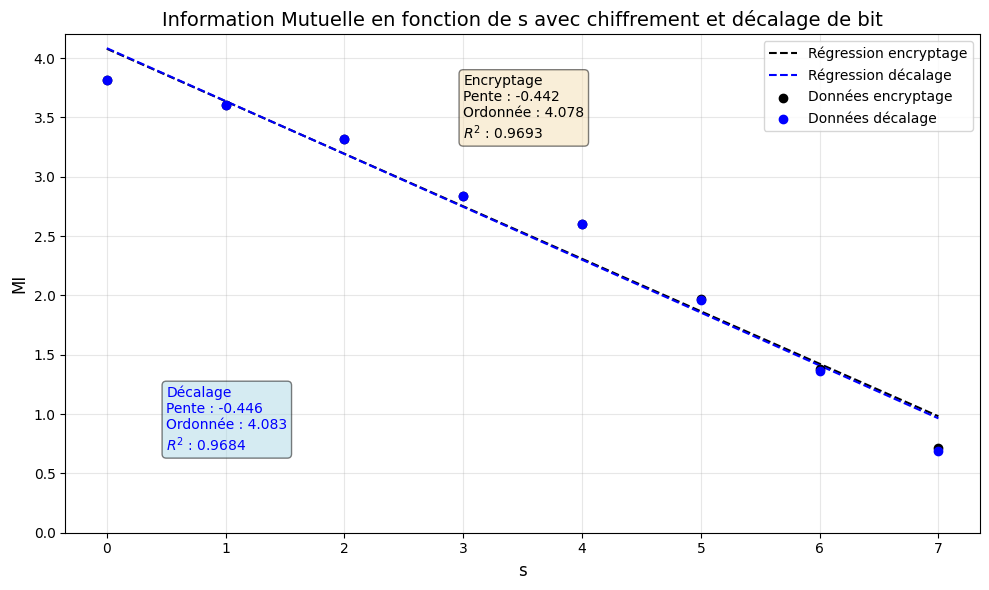

ANALYSE DE RÉGRESSION LINÉAIRE

Encryptage:
  Équation : y = -0.4424·x + 4.0777
  R² = 0.9693

Décalage:
  Équation : y = -0.4456·x + 4.0826
  R² = 0.9684


In [43]:
from sklearn.metrics import r2_score

fig, ax = plt.subplots(figsize=(10,6))

# Droites de régression
me, be = np.polyfit(S, mi_encrypt, 1)
md, bd = np.polyfit(S, mi_decalage, 1)

# Calcul des prédictions
y_pred_encrypt = me*np.array(S) + be
y_pred_decalage = md*np.array(S) + bd

# Calcul du coefficient de détermination R²
r2_encrypt = r2_score(mi_encrypt, y_pred_encrypt)
r2_decalage = r2_score(mi_decalage, y_pred_decalage)

# Tracer les droites de régression
plt.plot(S, y_pred_encrypt, '--k', label='Régression encryptage')
plt.plot(S, y_pred_decalage, '--b', label='Régression décalage')

# Afficher les coefficients sur le graphe avec R²
plt.text(3, mi_encrypt[0]-0.5, 
         f"Encryptage\nPente : {me:.3f}\nOrdonnée : {be:.3f}\n$R^2$ : {r2_encrypt:.4f}", 
         color='black', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.text(0.5, min(mi_decalage), 
         f"Décalage\nPente : {md:.3f}\nOrdonnée : {bd:.3f}\n$R^2$ : {r2_decalage:.4f}", 
         color='blue', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Points de données
plt.scatter(S, mi_encrypt, color='black', label='Données encryptage', zorder=5)   
plt.scatter(S, mi_decalage, color='blue', label='Données décalage', zorder=5)

plt.xlabel('s', fontsize=12)
plt.ylabel('MI', fontsize=12)
plt.ylim(0, mi_encrypt[0]*1.1)
plt.title('Information Mutuelle en fonction de s avec chiffrement et décalage de bit', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('mi_regression_analysis.pdf', bbox_inches='tight', dpi=300)
plt.show()

# Afficher les résultats dans la console
print("="*60)
print("ANALYSE DE RÉGRESSION LINÉAIRE")
print("="*60)
print(f"\nEncryptage:")
print(f"  Équation : y = {me:.4f}·x + {be:.4f}")
print(f"  R² = {r2_encrypt:.4f}")
print(f"\nDécalage:")
print(f"  Équation : y = {md:.4f}·x + {bd:.4f}")
print(f"  R² = {r2_decalage:.4f}")
print("="*60)

comportement linéaire désagréable 

Calcul avec SKlearn metrics

In [38]:
from sklearn.metrics import mutual_info_score
def mutual_information(x, y):
    """Calcule l'information mutuelle entre deux variables x et y"""
    return mutual_info_score(x, y)


Mon code ne renvoie pas la valeur parfaite de la MI mais donne la bonne variation entre les points

In [39]:
S = [i for i in range (0,8)]
mi_encrypt=[]
mi_decalage=[]
for s in S :
    x =  imggray.flatten()
    y =  chiffrage(imggray, s).flatten()
    z= decalage_bit_2D(imggray, s).flatten()
    mi_decalage.append(mutual_information(x, z))
    mi_encrypt.append(mutual_information(x, y))

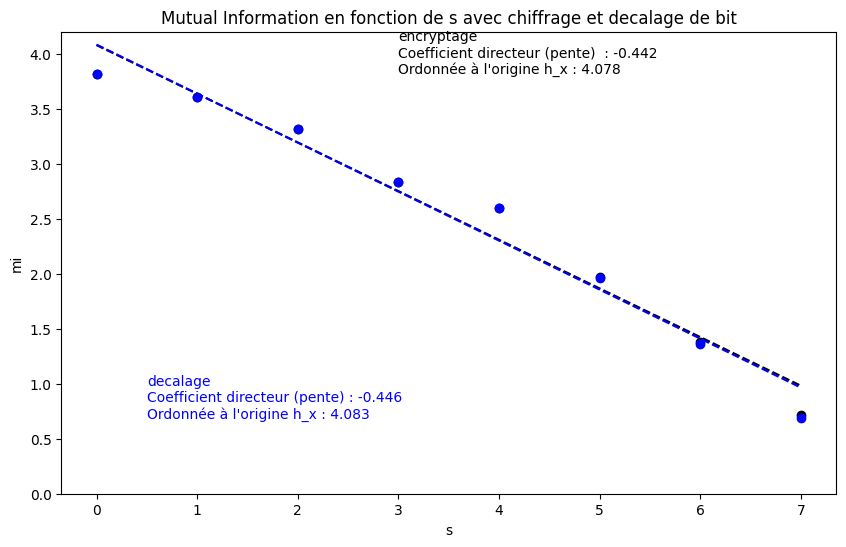

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
#droite de regression 
me, be = np.polyfit(S, mi_encrypt, 1)
md,bd = np.polyfit(S, mi_decalage, 1)
plt.plot(S, me*np.array(S) + be, '--k')
plt.plot(S, md*np.array(S) + bd, '--b')
#afficher les coeffs sur le graphe
# ameliore la position du texte sur le grapphe :
plt.text( 3, mi_encrypt[0], f"encryptage\nCoefficient directeur (pente)  : {me:.3f}\nOrdonnée à l'origine h_x : {be:.3f}", color='black')
plt.text( 0.5, min(mi_decalage), f"decalage\nCoefficient directeur (pente) : {md:.3f}\nOrdonnée à l'origine h_x : {bd:.3f}", color='blue')
plt.scatter (S, mi_encrypt, color ='black')   
plt.scatter (S, mi_decalage, color='blue')
plt.xlabel('s')
plt.ylabel('mi')
plt.ylim(0,mi_encrypt[0]*1.1)
plt.title('Mutual Information en fonction de s avec chiffrage et decalage de bit')
plt.show()

Pour un encrptage différent la MI est très similaire